# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>K-Nearest Neighbors</center>
### <center> Práctica KNN</center>

Documentación scikit learn:

https://scikit-learn.org/stable/modules/neighbors.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html



## K-vecinos más cercanos (KNN)



El algoritmo K-Nearest Neighbors, o simplemente KNN, funciona obteniendo un punto dado y evaluando sus "k" vecinos para encontrar similitudes. 

Se puede utilizar para clasificación o regresión.

La idea se basa en el hecho de que los puntos de datos similares estarán más cerca en el espacio que los puntos que son muy diferentes entre sí.  

Veamos el siguiente ejemplo elijamos el punto X y miremos sus 5 vecinos más cercanos:

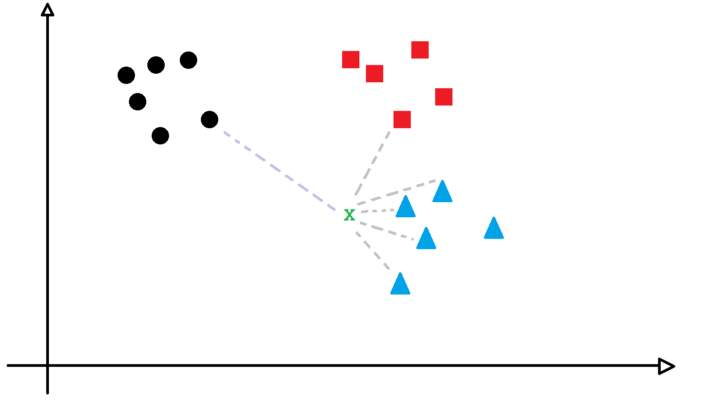

Se observa que 4 de esos puntos más cercanos son triángulos y sólo uno es un cuadrado. El "grupo" de círculos está demasiado lejos para ser considerado. 

Entonces,según la lógica KNN, podemos concluir que el punto X es un triángulo.

## Distancias

La distancia entre dos puntos nos permite determinar si esos puntos son "similares". Cuánto menor es la distancia mas similares serán.

Existen diferentes formas de medir una distancia o una similitud:

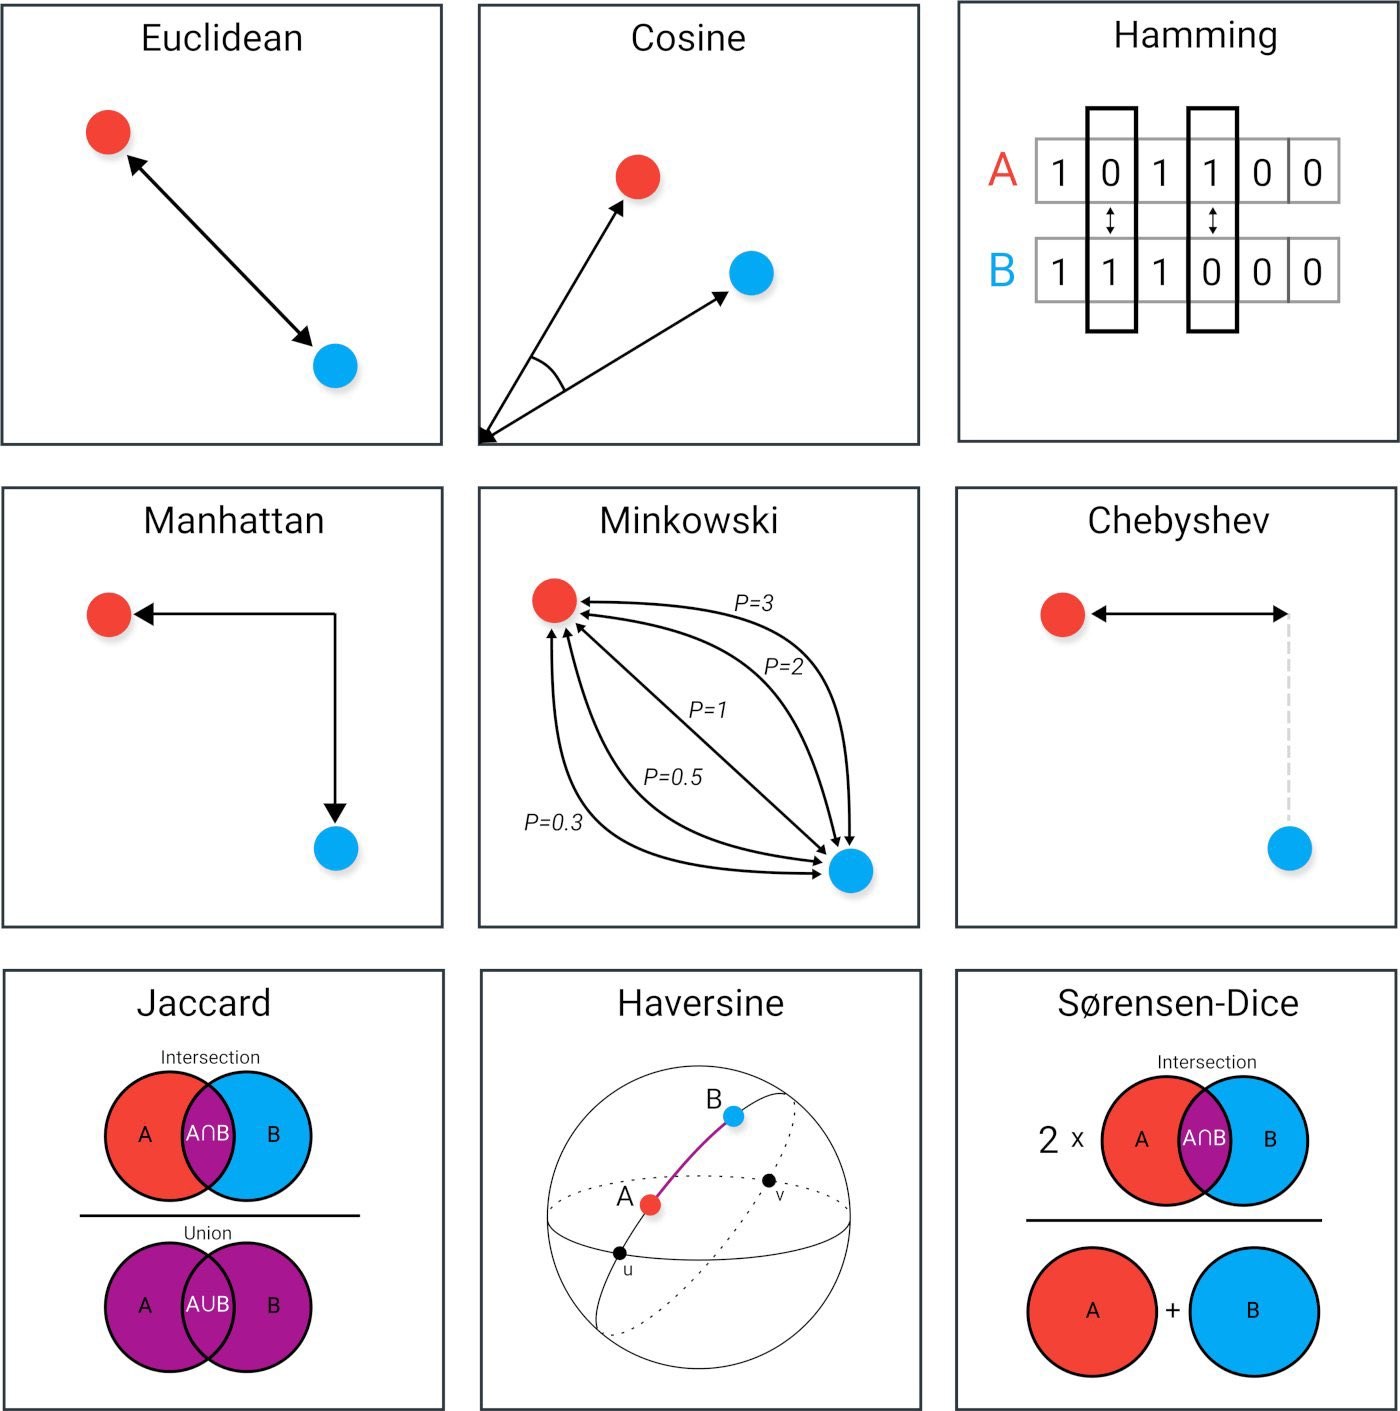

https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

Veamos unos ejemplos:

In [29]:
from sklearn.metrics import DistanceMetric

In [30]:
X=[[0,0],[1,1]]
Y=[[1,1],[2,2]]

euclidean = DistanceMetric.get_metric('euclidean')
chebyshev = DistanceMetric.get_metric('chebyshev')
manhattan = DistanceMetric.get_metric('manhattan')
canberra  = DistanceMetric.get_metric('canberra')

In [31]:
print(f'euclidea: {euclidean.pairwise(X,Y)[0][0]}')
print(f'manhattan: {manhattan.pairwise(X,Y)[0][0]}')
print(f'chebyshev: {chebyshev.pairwise(X,Y)[0][0]}')
print(f'canberra: {canberra.pairwise(X,Y)[0][0]}')

euclidea: 1.4142135623730951
manhattan: 2.0
chebyshev: 1.0
canberra: 2.0


In [32]:
manhattan.pairwise(X,Y)

array([[2., 4.],
       [0., 2.]])

## KNN Clasificación

Vamos a trabajar con el dataset "wine" y mediante KNN intentaremos clasificar la calidad del vino (bueno/malo) según sus características

In [33]:
#Datos
import numpy as np
import pandas as pd

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [34]:
#Cargo el dataset
df = pd.read_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/MATERIAL/wine.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#Ploteo variables de a pares
#sns.pairplot(df,hue='quality')

In [37]:
#Separar datos y etiquetas
x = df.iloc[:,0:11]
y = df.iloc[:,11]

#Separo conjunto de Train y de Test (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [38]:
type(y_train)

pandas.core.series.Series

Creamos un modelo con sus parámetros por defecto:

In [39]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [40]:
#Entrenar el modelo
KNN_Classifier.fit(x_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(x_test)

In [41]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  194
total:  320


In [42]:
accuracy_score(y_test,y_pred)

0.60625

Veamos que ocurre si variamos la cantidad de vecinos

In [43]:
# Variamos la cantidad de vecinos (K)

metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(1, len(x_test)) # vecinos desde 1 hasta cantidad total de puntos en test

for n in k_range:

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    metrics.append((n, (y_test == y_pred).sum()))

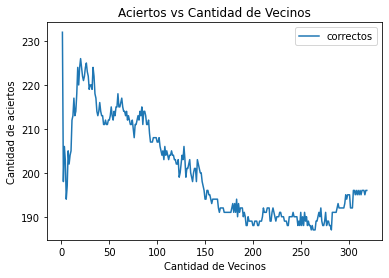

In [44]:
# ploteamos

df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos', 
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()


Veamos que ocurre al variar la cantidad de vecinos usando Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score

k_range=range(1,30) #canidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

In [48]:
y_train

642      bad
679      bad
473      bad
390     good
1096    good
        ... 
763      bad
835      bad
1216    good
559     good
684      bad
Name: quality, Length: 1279, dtype: object

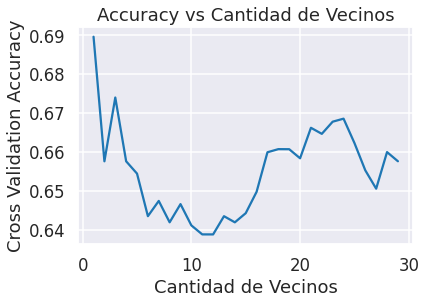

In [ ]:
#ploteamos accuracy vs cantidad de vecinos
plt.plot(k_range, k_scores)
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('Cross Validation Accuracy')
plt.title('Accuracy vs Cantidad de Vecinos')
plt.show()

### Optimización de hiperparámetros

La implementación de scikit learn nos permite setear los siguientes parámetros:

**n_neighbors**: número de vecinos a considerar, por defecto este valor esta seteado en 5.<br>
**algorithm**:algoritmo utilizado para calcular los vecinos más cercanos<br>
* ball_tree utilizará [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)
* kd_tree : utilizará [KDTree](https://https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree)
* brute : utilizará una búsqueda de fuerza bruta.

**metric**:  métrica a utilizar para el cálculo de la distancia. El valor predeterminado es "minkowski".
Las métricas válidas dependerán del algorítmo que utilicemos.<br>
* eculidea
* manhattan
* city block
* ...

**weights**:función de peso utilizada en la predicción<br>

* uniform : pesos uniformes, todos los puntos en cada "vecindario" pesan lo mismo.  
*  distance : el peso de cada punto (vecino) se asigna en forma inversa a su distancia.

Veamos primero las distancias admitidas por cada algoritmo

In [ ]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



Optimizamos los parámetros usando random search cross validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()
KNN_Classifier
#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.7255721 , 0.69664124, 0.63880413, 0.64037894, 0.7466966 ,
       0.68959769, 0.67944759, 0.731047  , 0.7459092 , 0.734172  ])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 22, 'metric': 'euclidean', 'algorithm': 'brute'}
0.7466966043307087


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.75

              precision    recall  f1-score   support

         bad       0.72      0.75      0.74       148
        good       0.78      0.75      0.76       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



Text(19.5, 0.5, 'True')

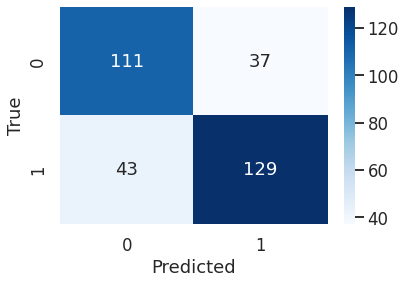

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

## KNN Regresión



La lógica de regresión KNN es muy similar a lo que se explicó anteriormente para clasificación. 

El algoritmo KNN calculará la regresión para el conjunto de datos y luego tomará la cantidad K de vecinos, verificará los resultados de esos vecinos y promediará los resultados, generando una estimación.

    Dada una nueva instancia, devolver el promedio(ponderado) de los valores de sus vecinos

Vamos a trabajar con el dataset "diamantes" y trataremos de aplicar regresión para predecir el quilate (carat) de los diamantes.


  **carat**: peso del diamante (0.2--5.01)

  **cut**: calidad del corte (Fair, Good, Very Good, Premium, Ideal)

  **color**: color del diamante,  J (peor) to D (mejor)

  **clarity**: una medida de cuán claro es el diamante(I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))

  **depth**: porcentaje de profundidad total = z / mean(x, y) = 2 * z / (x + y) (43--79)

  **table**: ancho de la parte superior del diamante en relación con el punto más ancho (43--95)

  **price**: precio en dólares estadounidenses (\$326--\$18,823)

  **x**: longitud en mm (0--10.74)

  **y**: ancho en mm (0--58.9)

  **z**: profundidad en mm (0--31.8)

In [ ]:
#Carga dataset
diam=pd.read_csv('./datasets/diamantes.csv')
diam.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


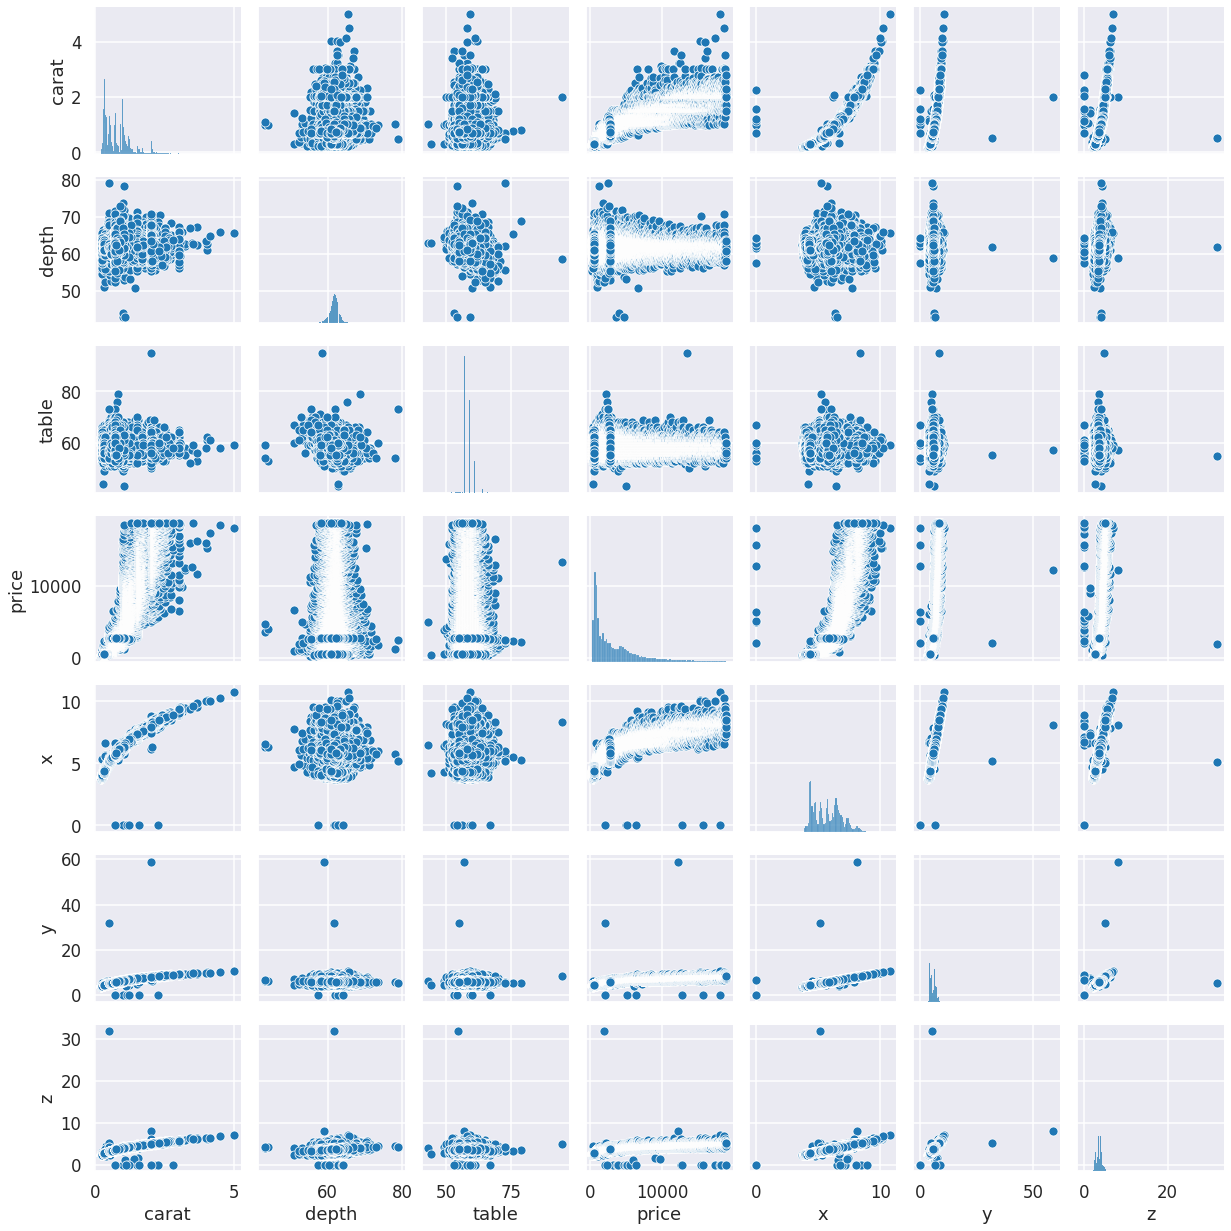

In [ ]:
#Gráfico de a pares
sns.pairplot(diam)

**Correlación**

A partir de este diagrama, podemos ver que *x, y* y *z* podrían ser buenos features ya que sus diagramas de dispersión muestran una posible relación lineal.Analicemos la correlación

In [ ]:
#Heatmap correlación
diam.corr().style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
#selecciono variables regresoras y a predecir
X = diam[['x', 'y', 'z']]
y = diam.carat

#Separacion Train/test  (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)

**Valores atípicos**

La regresión se ve muy afectada por los valores atípicos, ya que pueden interferir en el cálculo de la pendiente de la curva.



[Text(0.5, 0, 'Variable')]

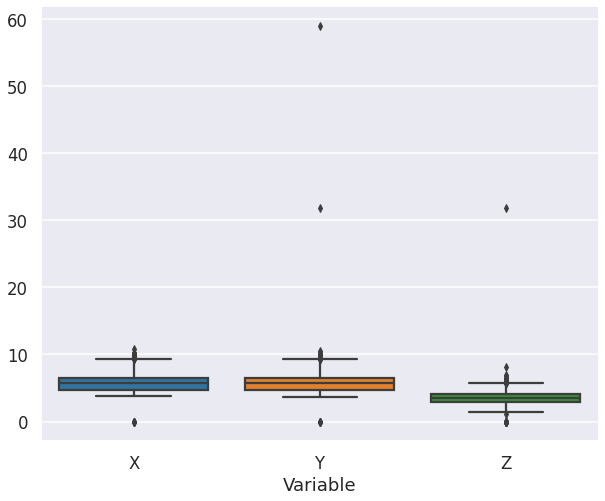

In [ ]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables=[]
valores=[]

variables =['X']*len(list(X_train.x)) + ['Y']*len(list(X_train.y)) + ['Z']*len(list(X_train.z))

valores=list(X_train.x) + list(X_train.y)+list(X_train.z)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

Usaremos la regla 1.5 x IQR: se eliminará todo lo que esté por encima o por debajo de 1.5 veces el rango entre cuantiles.

In [ ]:
#Medidas train
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
x,43152.0,5.731283,1.122783,0.0,4.71,5.69,6.54,10.74
y,43152.0,5.734739,1.150275,0.0,4.72,5.71,6.54,58.90
z,43152.0,3.538536,0.708813,0.0,2.91,3.53,4.03,31.80


In [ ]:
#Calculo los cuantiles de las variables x,y,z
x_q3, x_q1 = np.percentile(X_train.x, [75 ,25])
y_q3, y_q1 = np.percentile(X_train.y, [75 ,25])
z_q3, z_q1 = np.percentile(X_train.z, [75 ,25])

#Calculo e rango intercuartil de las variables x,y,z
iqr_x = x_q3 - x_q1
iqr_y = y_q3 - y_q1
iqr_z = z_q3 - z_q1

In [ ]:
# Elimino outliers de la variable 'x'
X_train = X_train.query(' x >= (@x_q1 - @iqr_x*1.5) & x <= (@x_q3 + @iqr_x*1.5) ')
y_train = y_train[X_train.index]

# Elimino outliers de la variable 'y'
X_train = X_train.query(' y >= (@y_q1 - @iqr_y*1.5) & y <= (@y_q3 + @iqr_y*1.5) ')
y_train = y_train[X_train.index]

# Elimino outliers de la variable 'z'
X_train = X_train.query(' z >= (@z_q1 - @iqr_z*1.5) & z <= (@z_q3 + @iqr_z*1.5) ')
y_train = y_train[X_train.index]

[Text(0.5, 0, 'Variable')]

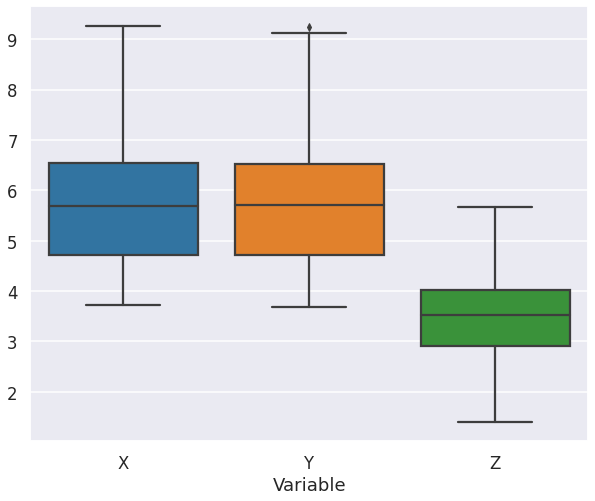

In [ ]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables=[]
valores=[]

variables =['X']*len(list(X_train.x)) + ['Y']*len(list(X_train.y)) + ['Z']*len(list(X_train.z))

valores=list(X_train.x) + list(X_train.y)+list(X_train.z)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

In [ ]:
#Heatmap correlación
X_train.corr().style.background_gradient(cmap='coolwarm')

,x,y,z
x,1.000000,0.998605,0.991232
y,0.998605,1.000000,0.990868
z,0.991232,0.990868,1.000000


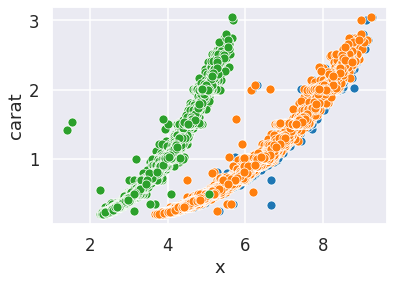

In [ ]:
sns.scatterplot(x=X_train.x,y=y_train)
sns.scatterplot(x=X_train.y,y=y_train)
sns.scatterplot(x=X_train.z,y=y_train)

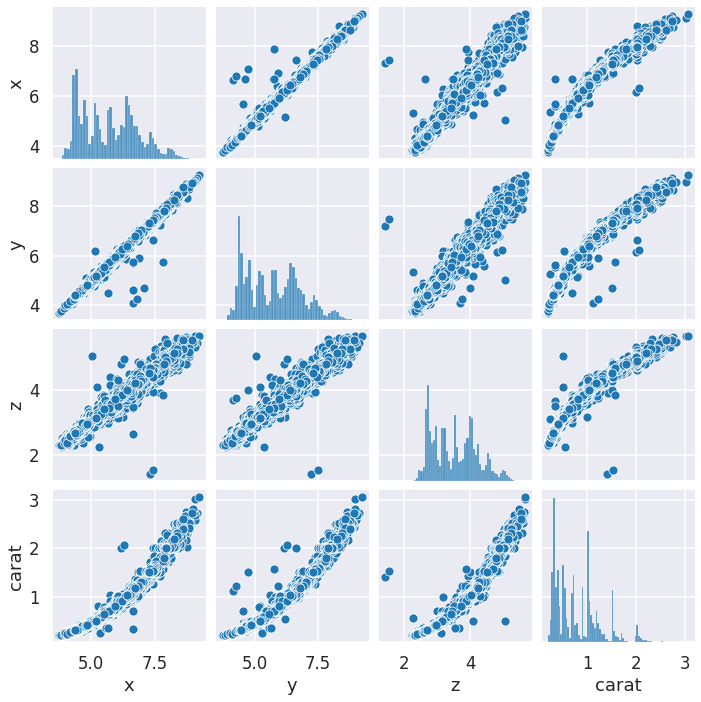

In [ ]:
#Grafico de a pares incluyendo variable a predecir
xy_train_sin_outliers = pd.concat([X_train, y_train], axis=1)
sns.pairplot(xy_train_sin_outliers)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(X_train, y_train)

#Hago una predicción
y_pred=knn_regressor.predict(X_test)

In [ ]:
y_pred

array([0.516, 0.348, 0.396, ..., 0.404, 0.722, 0.318])

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
# View
performance.head()

,Valor Real,Prediccion,Error
45936,0.51,0.516,-0.006
23023,0.35,0.348,0.002
34325,0.39,0.396,-0.006
38578,0.40,0.402,-0.002
15979,1.20,1.220,-0.020


In [ ]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 0.00046168594734890633
El error (rmse) de test es: 0.021486878492440596


In [ ]:
#Coef. de Determinación R2
score_knn = knn_regressor.score(X_test, y_test)
score_knn

0.9979148186843363

Comparemos la performance con una regresión lineal múltiple

In [ ]:
from sklearn.linear_model import LinearRegression

# Creo un modelo de regresion lineal y lo ajusto
lr_model = LinearRegression().fit(X_train, y_train)

#Hago una predicción
y_pred=lr_model.predict(X_test)

In [ ]:
#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 0.010297035291397692
El error (rmse) de test es: 0.10147430852879803


In [ ]:
#Coef. de Determinación R2
score_lr = lr_model.score(X_test, y_test)
score_lr

0.9534939590003898